In [1]:
import pandas as pd
from textblob import TextBlob
import glob

In [2]:
path = '/Users/qianzhuang/Academic/Upenn/Capstone/data/data_csv/comment/' # use your path
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df_pic = pd.read_csv(filename, index_col=None, header=0)
    li.append(df_pic)

frame = pd.concat(li, axis=0, ignore_index=True)

In [3]:
frame = frame.dropna()
frame.head()

,Unnamed: 0,CityID,Comments,Date,User
3,3,g60898,Here are some of the easiest ways to fly green...,Oct 2019,Hand Luggage Only
15,15,g60898,16 Cheapest cities to visit in the USA,May 2019,Hand Luggage Only
18,18,g60898,With the Fourth of July falling on a Thursday ...,Jul 2019,The Points Guy
21,21,g60898,From nine major metro areas around the U.S.: E...,Jun 2019,SmarterTravel
24,24,g60898,America’s biggest burgs have become thriving a...,Jul 2019,Outside Magazine


In [4]:
len(frame)

1430

In [5]:
def getSentimentValue(text):
    result = 0
    blob = TextBlob(text)
    for sentence in blob.sentences:
        result = result + sentence.sentiment.polarity
    return result

In [6]:
frame['Sentiment_value'] = frame.Comments.apply(getSentimentValue)

In [7]:
def getMainWord(text):
    blob = TextBlob(text)
    return blob.noun_phrases

In [8]:
frame['word_list'] = frame.Comments.apply(getMainWord)

In [9]:
frame

,Unnamed: 0,CityID,Comments,Date,User,Sentiment_value,word_list
3,3,g60898,Here are some of the easiest ways to fly green...,Oct 2019,Hand Luggage Only,1.000000,[easiest ways]
15,15,g60898,16 Cheapest cities to visit in the USA,May 2019,Hand Luggage Only,0.000000,"[cheapest, usa]"
18,18,g60898,With the Fourth of July falling on a Thursday ...,Jul 2019,The Points Guy,-0.037500,"[fourth, july, holiday travels, fourth, july]"
21,21,g60898,From nine major metro areas around the U.S.: E...,Jun 2019,SmarterTravel,0.247917,"[major metro areas, u.s., easy driving distanc..."
24,24,g60898,America’s biggest burgs have become thriving a...,Jul 2019,Outside Magazine,0.436364,"[america, ’ s, adventure hubs, new breed, outd..."
27,27,g60898,In order to take advantage of this historical ...,Apr 2019,Matador Network,0.500000,"[historical moment, ’ ve, pride parades]"
30,30,g60898,"The oft-overlooked, still sweet, outdoor-focus...",Oct 2019,Outside Magazine,0.350000,[]
33,33,g60898,Did your go-to airport make the list?,Aug 2019,The Points Guy,0.000000,[go-to airport]
39,39,g60898,Miami is the perfect beach destination with un...,May 2019,Business Insider,1.358333,"[perfect beach destination, unique food, amazi..."
42,42,g60898,Ready for the rush?,Jul 2019,SmarterTravel,0.200000,[ready]


In [10]:
frame.groupby(frame.CityID)['Comments'].count()

CityID
g147415     61
g28970     163
g29212       4
g29494       8
g29786      27
g30196     193
g32999      16
g33388     174
g33804       2
g34009       2
g34675       9
g37209      28
g37835       3
g39426       3
g40024       5
g42391       1
g43501       8
g44926       5
g45926       1
g46874       1
g49463       4
g49709       4
g50226       9
g51560      10
g51947       1
g54171     172
g54184       4
g54760       2
g55229     149
g58653       4
g60745       3
g60805      14
g60893      36
g60898      89
g60922      28
g60954       4
g60958      77
g60982     106
Name: Comments, dtype: int64

In [13]:
cityUrl = ['https://www.tripadvisor.com/Tourism-g32999-Sacramento_California-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g33388-Denver_Colorado-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g33804-Hartford_Connecticut-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g34009-Dover_Delaware-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g28970-Washington_DC_District_of_Columbia-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g34675-Tallahassee_Florida-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60898-Atlanta_Georgia-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60982-Honolulu_Oahu_Hawaii-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g44926-Springfield_Missouri-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g37209-Indianapolis_Indiana-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g37835-Des_Moines_Iowa-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60747-Topeka_Kansas-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g39426-Frankfort_Kentucky-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g40024-Baton_Rouge_Louisiana-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g29212-Augusta_Georgia-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g29494-Annapolis_Maryland-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60745-Boston_Massachusetts-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g42391-Lansing_Ingham_County_Michigan-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g43501-Saint_Paul_Minnesota-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60805-Jacksonville_Florida-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g44526-Jefferson_City_Missouri-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g51947-Lincoln_City_Oregon-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g45926-Carson_City_Nevada-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g49049-Concord_North_Carolina-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g46874-Trenton_New_Jersey-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60958-Santa_Fe_New_Mexico-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g29786-Albany_New_York-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g49463-Raleigh_North_Carolina-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g49709-Bismarck_North_Dakota-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g50226-Columbus_Ohio-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g51560-Oklahoma_City_Oklahoma-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60954-Salem_Massachusetts-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g52787-Harrisburg_Pennsylvania-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g147415-New_Providence_Island_Bahamas-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g54184-Columbia_South_Carolina-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g54760-Pierre_South_Dakota-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g55229-Nashville_Davidson_County_Tennessee-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g30196-Austin_Texas-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60922-Salt_Lake_City_Utah-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g57324-Montpelier_Vermont-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g60893-Richmond_Virginia-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g58653-Olympia_Washington-Vacations.html',
 'https://www.tripadvisor.com/Tourism-g54171-Charleston_South_Carolina-Vacations.html']

List_cityUrlID = []
List_cityUrlName = []

for i in range(0,len(cityUrl)):
    List_cityUrlID.append(cityUrl[i].split('-')[1])
    List_cityUrlName.append(cityUrl[i].split('-')[-2])

def getCityName(num):
    return List_cityUrlName[List_cityUrlID.index(num)]

frame['Full_Name'] = frame.CityID.apply(getCityName)

In [14]:
def getState(string):
    return string.split('_')[-1]
def getCity(string):
    return string.split('_')[0]

frame['City'] = frame.Full_Name.apply(getCity)
frame['State'] = frame.Full_Name.apply(getState)

In [15]:
frame

,Unnamed: 0,CityID,Comments,Date,User,Sentiment_value,word_list,Full_Name,City,State
3,3,g60898,Here are some of the easiest ways to fly green...,Oct 2019,Hand Luggage Only,1.000000,[easiest ways],Atlanta_Georgia,Atlanta,Georgia
15,15,g60898,16 Cheapest cities to visit in the USA,May 2019,Hand Luggage Only,0.000000,"[cheapest, usa]",Atlanta_Georgia,Atlanta,Georgia
18,18,g60898,With the Fourth of July falling on a Thursday ...,Jul 2019,The Points Guy,-0.037500,"[fourth, july, holiday travels, fourth, july]",Atlanta_Georgia,Atlanta,Georgia
21,21,g60898,From nine major metro areas around the U.S.: E...,Jun 2019,SmarterTravel,0.247917,"[major metro areas, u.s., easy driving distanc...",Atlanta_Georgia,Atlanta,Georgia
24,24,g60898,America’s biggest burgs have become thriving a...,Jul 2019,Outside Magazine,0.436364,"[america, ’ s, adventure hubs, new breed, outd...",Atlanta_Georgia,Atlanta,Georgia
27,27,g60898,In order to take advantage of this historical ...,Apr 2019,Matador Network,0.500000,"[historical moment, ’ ve, pride parades]",Atlanta_Georgia,Atlanta,Georgia
30,30,g60898,"The oft-overlooked, still sweet, outdoor-focus...",Oct 2019,Outside Magazine,0.350000,[],Atlanta_Georgia,Atlanta,Georgia
33,33,g60898,Did your go-to airport make the list?,Aug 2019,The Points Guy,0.000000,[go-to airport],Atlanta_Georgia,Atlanta,Georgia
39,39,g60898,Miami is the perfect beach destination with un...,May 2019,Business Insider,1.358333,"[perfect beach destination, unique food, amazi...",Atlanta_Georgia,Atlanta,Georgia
42,42,g60898,Ready for the rush?,Jul 2019,SmarterTravel,0.200000,[ready],Atlanta_Georgia,Atlanta,Georgia


In [16]:
def changeName(name):
    if(name == "Bahamas"):
        return "Florida"
    else:
        return name

In [17]:
frame.State = frame.State.apply(changeName)

In [18]:
sub_frame = frame.groupby(frame.State)['Sentiment_value'].sum().to_frame()

In [19]:
list_sentiment = sub_frame.Sentiment_value
list_sentiment = list_sentiment.to_list()

In [20]:
list_state = frame.State.unique()
list_state.sort()

In [21]:
list_state

array(['California', 'Carolina', 'Colorado', 'Columbia', 'Connecticut',
       'Dakota', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Indiana',
       'Iowa', 'Jersey', 'Kentucky', 'Louisiana', 'Maryland',
       'Massachusetts', 'Mexico', 'Michigan', 'Minnesota', 'Missouri',
       'Nevada', 'Ohio', 'Oklahoma', 'Oregon', 'Tennessee', 'Texas',
       'Utah', 'Virginia', 'Washington', 'York'], dtype=object)

In [22]:
dic = {}

In [23]:
for i in range(0,len(list_state)):
    dic.update({list_state[i]:list_sentiment[i]})

In [24]:
dic

{'California': 6.62739898989899,
 'Carolina': 98.62524651274649,
 'Colorado': 72.06548340548339,
 'Columbia': 74.20584920634923,
 'Connecticut': 0.8,
 'Dakota': 4.3125,
 'Delaware': 0.790873015873016,
 'Florida': 28.958814376760806,
 'Georgia': 38.067894119769115,
 'Hawaii': 47.00781355218859,
 'Indiana': 11.676896043771047,
 'Iowa': 1.890873015873016,
 'Jersey': 0.46666666666666673,
 'Kentucky': 1.537070707070707,
 'Louisiana': 1.340832130832131,
 'Maryland': 3.4752314814814813,
 'Massachusetts': 2.3916666666666666,
 'Mexico': 41.91092652717653,
 'Michigan': 0.2,
 'Minnesota': 4.089152236652237,
 'Missouri': 0.875,
 'Nevada': 0.5,
 'Ohio': 2.8303571428571432,
 'Oklahoma': 4.936706349206349,
 'Oregon': 0.37777777777777777,
 'Tennessee': 75.49594065656564,
 'Texas': 92.27022005771997,
 'Utah': 17.283982683982686,
 'Virginia': 23.338710317460315,
 'Washington': 1.1497065897065895,
 'York': 12.991314935064937}

In [29]:
def getPostive(num):
    if(num>=0):
        return 1
    else:
        return 0

def getNegative(num):
    if(num>=0):
        return 0
    else:
        return 1

In [48]:
frame['positive'] = frame.Sentiment_value.apply(getPostive)
frame['negative'] = frame.Sentiment_value.apply(getNegative)

In [49]:
frame.head()

,Unnamed: 0,CityID,Comments,Date,User,Sentiment_value,word_list,Full_Name,City,State,positive,neagtive,negative
3,3,g60898,Here are some of the easiest ways to fly green...,Oct 2019,Hand Luggage Only,1.000000,[easiest ways],Atlanta_Georgia,Atlanta,Georgia,1,0,0
15,15,g60898,16 Cheapest cities to visit in the USA,May 2019,Hand Luggage Only,0.000000,"[cheapest, usa]",Atlanta_Georgia,Atlanta,Georgia,1,0,0
18,18,g60898,With the Fourth of July falling on a Thursday ...,Jul 2019,The Points Guy,-0.037500,"[fourth, july, holiday travels, fourth, july]",Atlanta_Georgia,Atlanta,Georgia,0,1,1
21,21,g60898,From nine major metro areas around the U.S.: E...,Jun 2019,SmarterTravel,0.247917,"[major metro areas, u.s., easy driving distanc...",Atlanta_Georgia,Atlanta,Georgia,1,0,0
24,24,g60898,America’s biggest burgs have become thriving a...,Jul 2019,Outside Magazine,0.436364,"[america, ’ s, adventure hubs, new breed, outd...",Atlanta_Georgia,Atlanta,Georgia,1,0,0


In [50]:
df_1 = frame.groupby(frame.State)['positive'].sum().to_frame()

In [51]:
df_2 = frame.groupby(frame.State)['negative'].sum().to_frame()

In [56]:
df_1 = df_1.merge(df_2, left_on = 'State', right_on = 'State')

In [58]:
df_1['total'] = df_1.positive+df_1.negative
df_1['positive'] = (df_1.positive/df_1.total)*100
df_1['negative'] = (df_1.negative/df_1.total)*100
df_1.to_json('./pAndN.json')

In [59]:
df_1

,positive,negative,total
State,,,
California,93.750000,6.250000,16
Carolina,93.888889,6.111111,180
Colorado,89.655172,10.344828,174
Columbia,90.184049,9.815951,163
Connecticut,100.000000,0.000000,2
Dakota,100.000000,0.000000,6
Delaware,100.000000,0.000000,2
Florida,88.095238,11.904762,84
Georgia,88.172043,11.827957,93


In [63]:
def getMonth(string):
    return string[0:3]

In [64]:
frame['month'] = frame.Date.apply(getMonth)

In [67]:
mont_df = frame.groupby(frame.month)['Sentiment_value'].sum().to_frame()

In [70]:
mont_df.to_json("./month.json")

In [14]:
import os
import pandas as pd
import numpy as np
import imageio
from skimage.color import rgb2gray
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from PIL import Image, ImageFile
import urllib.request
import requests
from io import BytesIO
from random import choices

In [15]:
test = 'https://dynamic-media-cdn.tripadvisor.com/media/photo-c/2560x500/15/0d/b4/af/caption.jpg?w=900&h=-1&s=1'

In [38]:
response = requests.get(test)
img = Image.open(BytesIO(response.content))
a1 = np.asarray(img)

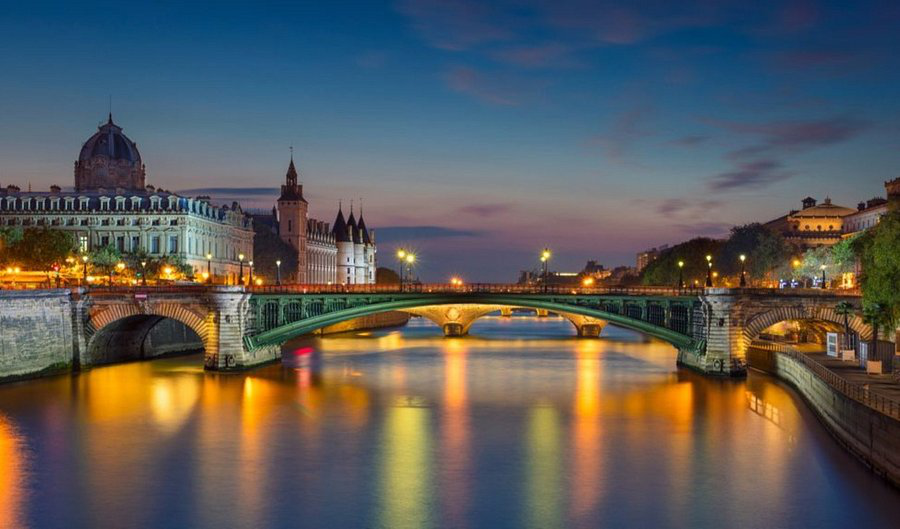

In [39]:
img

In [48]:
img.size

(900, 529)

In [40]:
out = img.resize((64, 64))

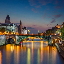

In [41]:
out

In [44]:
img,out

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=900x529 at 0x120791320>,
 <PIL.Image.Image image mode=RGB size=64x64 at 0x120416898>)